<h1 align=center>King County Housing Analysis</h1>


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from random import gauss
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')



 <h2 align=center>Understanding the Data</h2>

In [2]:
# IMPORTING THE DATA 
df = pd.read_csv('../data/kc_house_data.csv')


In [3]:
# SHAPE OF DATA FRAME
df.shape

(21597, 21)

In [4]:
# DATA FRAME
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597,21597,21597,21597,21597,21597,21597,19221,21534,21597,21597,21597,21597,17755,21597,21597,21597,21597,21597
mean,"4,580,474,287.77","540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60","1,971.00",83.64,"98,077.95",47.56,-122.21,"1,986.62","12,758.28"
std,"2,876,735,715.75","367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,"27,274.44"
min,1000102,78000,1,0.50,370,520,1,0,0,1,3,370,1900,0,98001,47.16,-122.52,399,651
25%,2123049175,322000,3,1.75,1430,5040,1,0,0,3,7,1190,1951,0,98033,47.47,-122.33,1490,5100
50%,3904930410,450000,3,2.25,1910,7618,1.50,0,0,3,7,1560,1975,0,98065,47.57,-122.23,1840,7620
75%,7308900490,645000,4,2.50,2550,10685,2,0,0,4,8,2210,1997,0,98118,47.68,-122.12,2360,10083
max,9900000190,7700000,33,8,13540,1651359,3.50,1,4,5,13,9410,2015,2015,98199,47.78,-121.31,6210,871200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

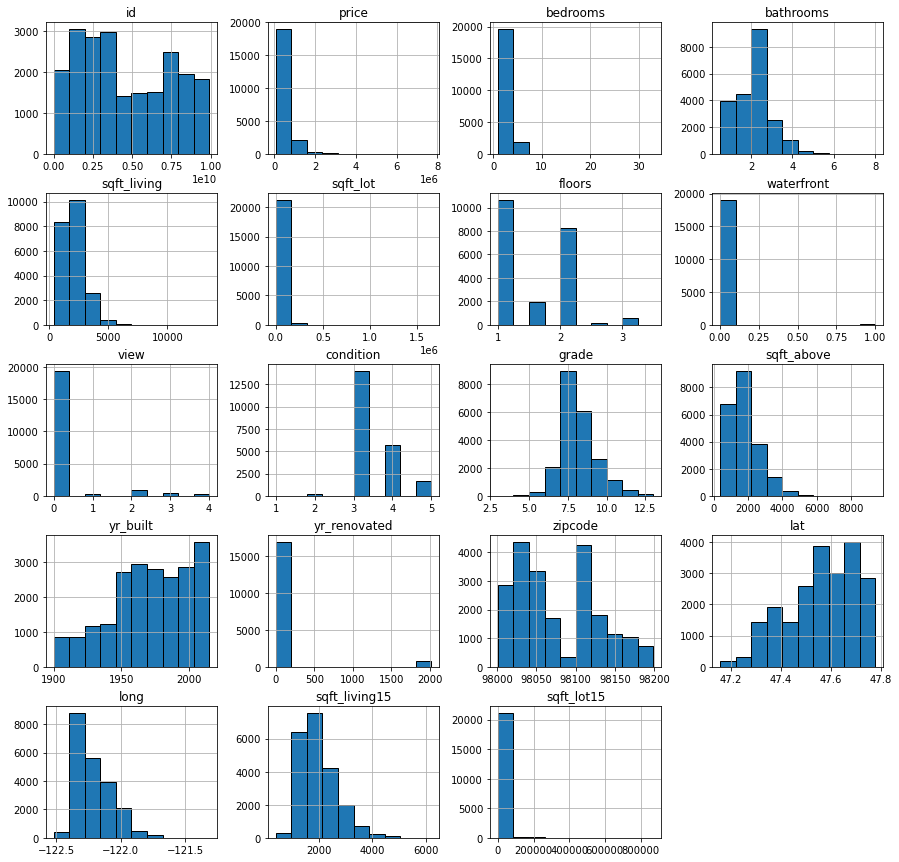

In [8]:
# PLOT DATA HISTOGRAM
df.hist(figsize=(15,15), edgecolor = 'black');

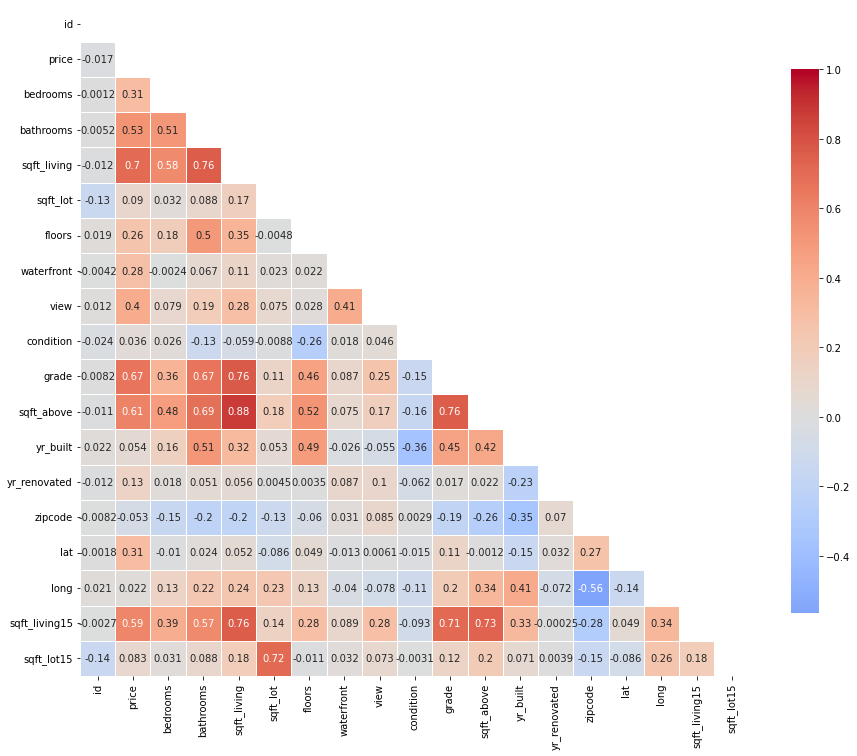

In [9]:
# HEATMAP FOR CORRELATION DATAFRAME

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

 <h2 align=center>Data Cleaning</h2>

**Check List:**

* Missing values
* Data type conversions
* Checking for and removing multicollinearity
* Normalizing our numeric data
* Converting categorical data to numeric



In [10]:
# CHECKING FOR DUPLICATES

len(set(df['id']))

21420

In [11]:
# DROPPING DUPLICATES IN ID COLUMN

df.drop_duplicates(subset='id', inplace=True)
df.shape

(21420, 21)

In [12]:
# CHECKING FOR OBJECTS IN SQFT_BASEMENT

df['sqft_basement'].head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

In [13]:
# REPLACE VALUES IN 'SQFT_BASEMENT' == TO '?' FOR '0'

df.loc[df['sqft_basement'] == '?','sqft_basement'] = 0.0

In [14]:
# CHECKING 'YR_RENOVATED' 

df['yr_renovated'].head()

0      0
1   1991
2    NaN
3      0
4      0
Name: yr_renovated, dtype: float64

In [15]:
# CHANGING 'YR_RENOVATED' FOR 'INT64'

df['yr_renovated'] = df['yr_renovated'].astype('Int64')
df['yr_renovated']

0           0
1        1991
2        <NA>
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21420, dtype: Int64

In [16]:
# CHECK FOR NULL VALUES

df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [17]:
# 'WATERFRONT' VALUES

df['waterfront'].unique()

array([nan,  0.,  1.])

In [18]:
# 'VIEW' VALUES

df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [19]:
# 'GRADE' VALUES

df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [20]:
# 'condition' VALUES

df['condition'].unique()

array([3, 5, 4, 1, 2])

In [21]:
# FILL NAN IN 'YR_RENOVATED' WITH '0'

df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [22]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
# DROPPING COLUMNS

df.drop(columns = ['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 
                   'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace = True)

In [24]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900,3,1,1180,5650,1,NaN,3,7,1955
1,538000,3,2.25,2570,7242,2,0,3,7,1951
2,180000,2,1,770,10000,1,0,3,6,1933
3,604000,4,3,1960,5000,1,0,5,7,1965
4,510000,3,2,1680,8080,1,0,3,8,1987
...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,1131,3,0,3,8,2009
21593,400000,4,2.50,2310,5813,2,0,3,8,2014
21594,402101,2,0.75,1020,1350,2,0,3,7,2009
21595,400000,3,2.50,1600,2388,2,NaN,3,8,2004


In [25]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1,0.31,0.53,0.70,0.09,0.26,0.28,0.03,0.67,0.05
bedrooms,0.31,1,0.52,0.58,0.03,0.18,-0.00,0.03,0.36,0.16
bathrooms,0.53,0.52,1,0.76,0.09,0.50,0.07,-0.13,0.67,0.51
sqft_living,0.70,0.58,0.76,1,0.17,0.35,0.11,-0.06,0.76,0.32
sqft_lot,0.09,0.03,0.09,0.17,1,-0.01,0.02,-0.01,0.11,0.05
floors,0.26,0.18,0.50,0.35,-0.01,1,0.02,-0.27,0.46,0.49
waterfront,0.28,-0.00,0.07,0.11,0.02,0.02,1,0.02,0.09,-0.03
condition,0.03,0.03,-0.13,-0.06,-0.01,-0.27,0.02,1,-0.15,-0.37
grade,0.67,0.36,0.67,0.76,0.11,0.46,0.09,-0.15,1,0.45
yr_built,0.05,0.16,0.51,0.32,0.05,0.49,-0.03,-0.37,0.45,1


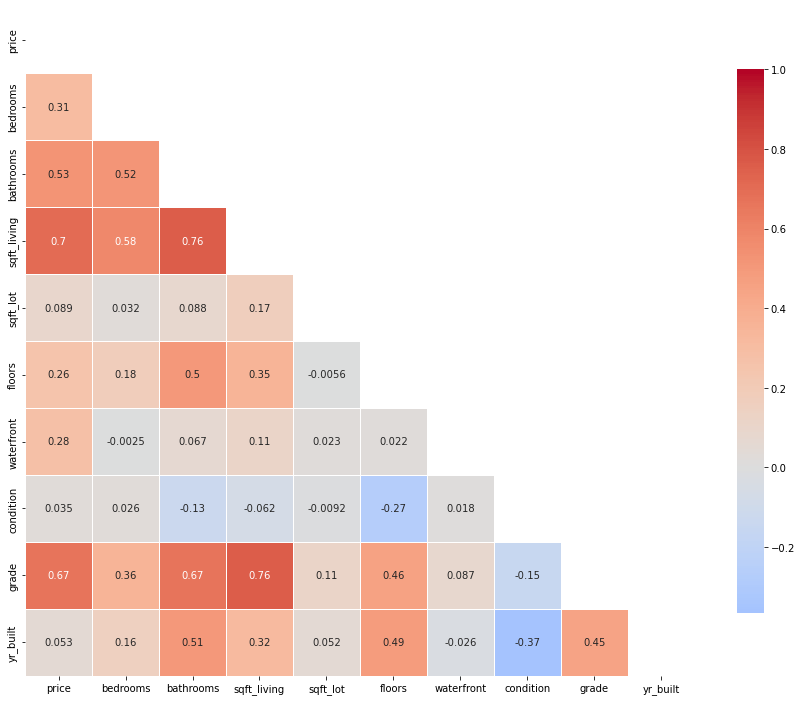

In [26]:
# HEATMAP FOR CORRELATION DATAFRAME

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [27]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

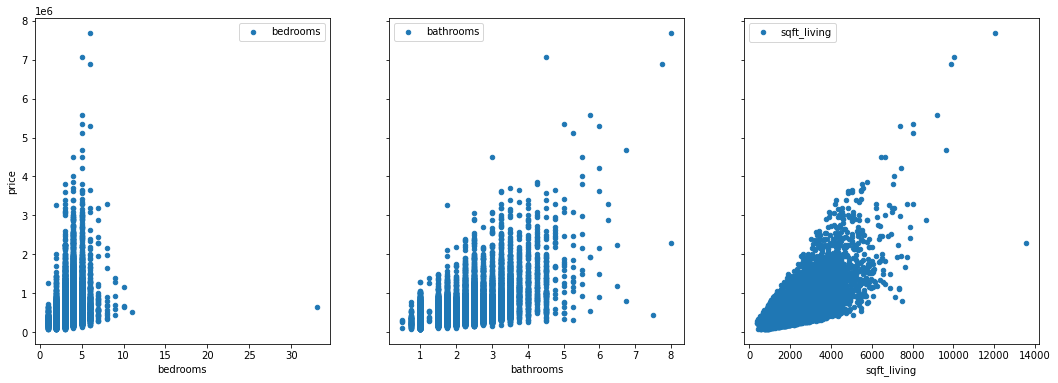

In [28]:
# PLOTING RELATIONSHIP BETWEEN PRICE (BEDROOM, BATHROOM AND SQFT_LINVING)

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

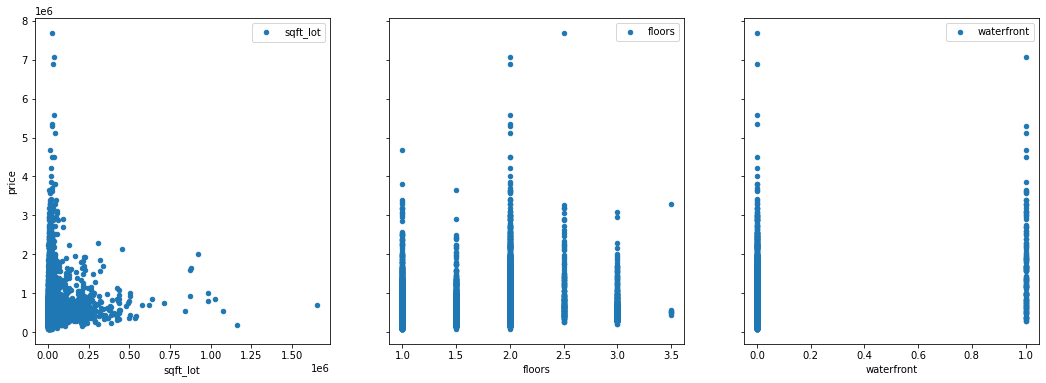

In [29]:
# PLOTING RELATIONSHIP BETWEEN PRICE (SQFT_LOT, FLOORS AND WATERFRONT)

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_lot', 'floors', 'waterfront']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

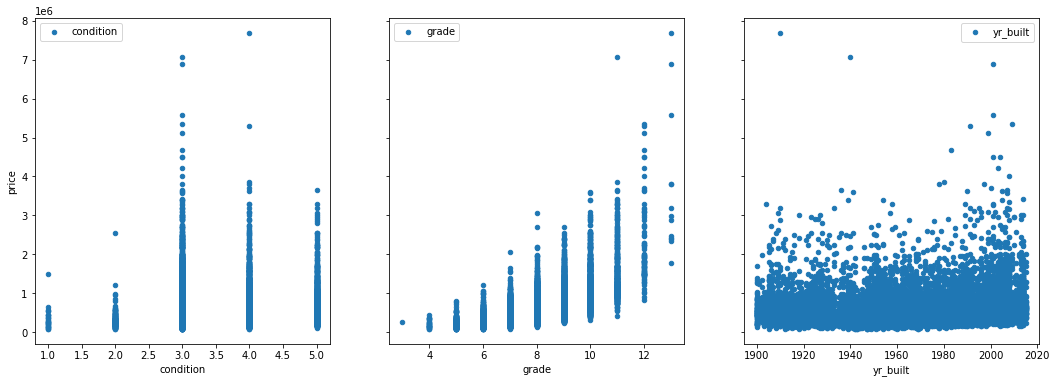

In [30]:
# PLOTING RELATIONSHIP BETWEEN PRICE (CONDITION, GRADE AND YR_BUILT)

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['condition', 'grade', 'yr_built']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

In [31]:
# DROPPING 'WATERFRONT'

df.drop(columns = ['waterfront'], inplace = True)

In [32]:
# WE CAN SEE 33 BEDROOMS AND OTHER ANOMALIES THAT WILL BE CONSIDER OUTLIERS

pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
count,21420,21420,21420,21420,21420,21420,21420,21420,21420
mean,"540,739.30",3.37,2.12,"2,083.13","15,128.04",1.50,3.41,7.66,"1,971.09"
std,"367,931.11",0.93,0.77,918.81,"41,530.80",0.54,0.65,1.17,29.39
min,78000,1,0.50,370,520,1,1,3,1900
25%,322500,3,1.75,1430,5040,1,3,7,1952
50%,450000,3,2.25,1920,7614,1.50,3,7,1975
75%,645000,4,2.50,2550,"10,690.50",2,4,8,1997
max,7700000,33,8,13540,1651359,3.50,5,13,2015


In [33]:
# OBTAINING Z-SCORES  
zscore = np.abs(stats.zscore(df))
zscore 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,0.87,0.40,1.45,0.98,0.23,0.92,0.63,0.57,0.55
1,0.01,0.40,0.17,0.53,0.19,0.93,0.63,0.57,0.68
2,0.98,1.48,1.45,1.43,0.12,0.92,0.63,1.42,1.30
3,0.17,0.68,1.15,0.13,0.24,0.92,2.44,0.57,0.21
4,0.08,0.40,0.15,0.44,0.17,0.92,0.63,0.29,0.54
...,...,...,...,...,...,...,...,...,...
21592,0.49,0.40,0.50,0.60,0.34,2.78,0.63,0.29,1.29
21593,0.38,0.68,0.50,0.25,0.22,0.93,0.63,0.29,1.46
21594,0.38,1.48,1.78,1.16,0.33,0.93,0.63,0.57,1.29
21595,0.38,0.40,0.50,0.53,0.31,0.93,0.63,0.29,1.12


In [34]:
# DETECTING OUTLIERS WITH OVER 3 STANDARD DEVIATION FROM THE MEAN IN DATAFRAME

outliers = df[(np.abs(zscore) > 3).any(1)]
outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
5,1230000,4,4.50,5420,101930,1,3,11,2001
21,2000000,3,2.75,3050,44867,1,3,9,1968
36,550000,4,1,1660,34848,1,1,5,1933
145,921500,4,2.50,3670,315374,2,4,9,1994
153,2250000,4,3.25,5180,19850,2,3,12,2006
...,...,...,...,...,...,...,...,...,...
21532,1060000,2,1.50,2370,184231,2,3,11,2005
21535,1380000,5,4.50,4350,13405,2,3,11,2014
21552,1700000,4,3.50,3830,8963,2,3,10,2014
21560,3570000,5,4.50,4850,10584,2,3,10,2007


In [35]:
# OUTLIER DESCRIBE TABLE EXAMPLE: 33 BEDROOMS 

pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
outliers.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
count,1031,1031,1031,1031,1031,1031,1031,1031,1031
mean,"1,342,068.77",4.12,3.17,"3,757.56","103,084.73",1.74,3.29,9.22,"1,977.36"
std,"941,649.95",1.65,1.19,"1,619.45","155,128.14",0.52,0.74,1.93,30.27
min,78000,1,0.75,410,1037,1,1,3,1900
25%,568000,3,2.50,2685,"10,386.50",1,3,8,1959
50%,1140000,4,3.25,3820,21300,2,3,10,1988
75%,1880000,5,4,4755,"199,596.50",2,4,11,2001
max,7700000,33,8,13540,1651359,3.50,5,13,2015


In [36]:
# OBTAINING ALL DATA THAT IS IN BETWEEN 3 STANDAR DEVIATION OF THE MEAN, ELIMINATING OUTLIERS

df = df[(zscore < 3).all(axis=1)]
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,221900,3,1,1180,5650,1,3,7,1955
1,538000,3,2.25,2570,7242,2,3,7,1951
2,180000,2,1,770,10000,1,3,6,1933
3,604000,4,3,1960,5000,1,5,7,1965
4,510000,3,2,1680,8080,1,3,8,1987
...,...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,1131,3,3,8,2009
21593,400000,4,2.50,2310,5813,2,3,8,2014
21594,402101,2,0.75,1020,1350,2,3,7,2009
21595,400000,3,2.50,1600,2388,2,3,8,2004


In [37]:
# NORMALIZING OUR NUMERIC DATA FOR DESCRIBE FUNCTION

pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
count,20389,20389,20389,20389,20389,20389,20389,20389,20389
mean,"500,218.89",3.34,2.07,"1,998.46","10,680.38",1.48,3.42,7.58,"1,970.78"
std,"251,612.74",0.86,0.70,778.11,"13,611.65",0.54,0.64,1.06,29.31
min,82000,1,0.50,370,520,1,2,5,1900
25%,318400,3,1.50,1410,5000,1,3,7,1951
50%,442000,3,2.25,1880,7486,1,3,7,1974
75%,620000,4,2.50,2470,10189,2,4,8,1996
max,1640000,6,4.25,4800,139392,3,5,11,2015


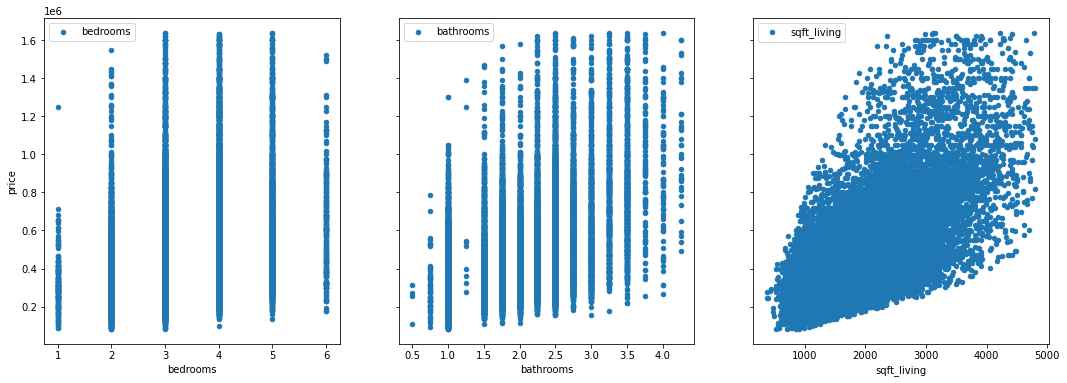

In [38]:
# RE-PLOTING RELATIONSHIP BETWEEN PRICE (BEDROOM, BATHROOM AND SQFT_LINVING) AFTER ELIMINATING OUTLIERS

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

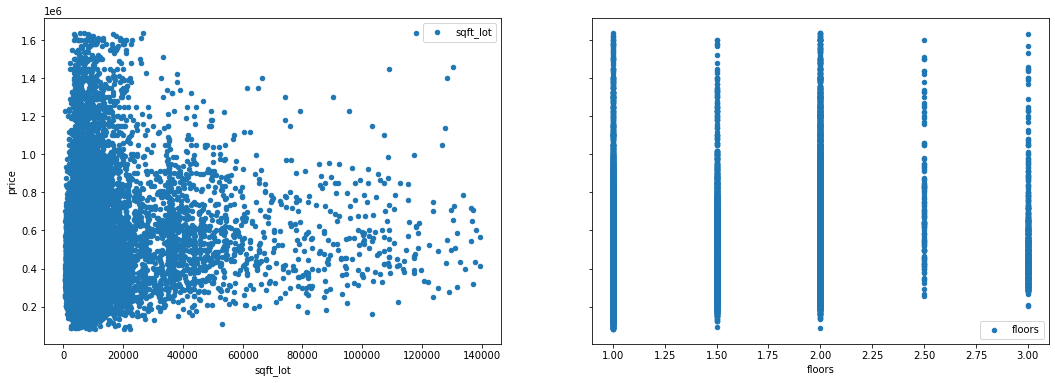

In [39]:
# RE-PLOTING RELATIONSHIP BETWEEN PRICE (SQFT_LOT AND FLOORS) AFTER ELIMINATING OUTLIERS

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_lot', 'floors']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

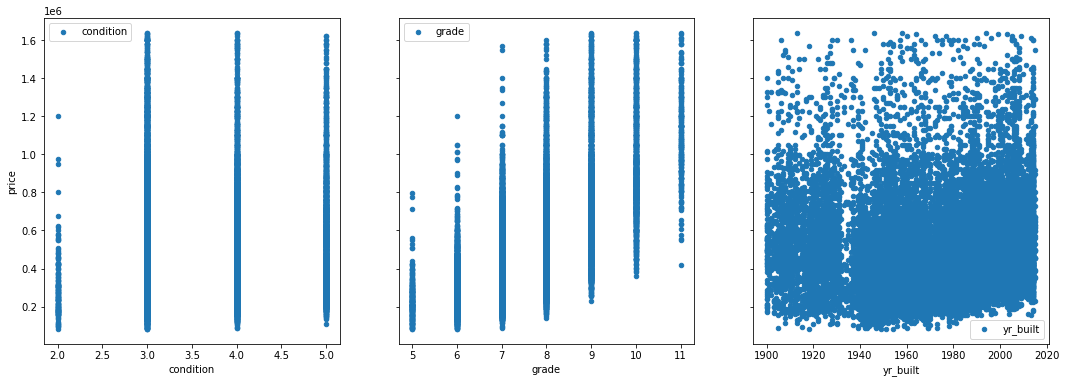

In [40]:
# RE-PLOTING RELATIONSHIP BETWEEN PRICE (CONDITION, GRADE AND YR_BUILT) AFTER ELIMINATING OUTLIERS


fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['condition', 'grade', 'yr_built']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

 <h2 align=center>Baseline Model</h2>

In [41]:
# DROPPING COLUMNS
df.drop(columns = ['floors', 'yr_built'], inplace = True)

In [42]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'condition', 'grade'],
      dtype='object')

In [43]:
# DATA SEPARATION INTO PREDITORS AND TARGET

house_preds = df.drop('price', axis=1)
house_target = df['price']
house_preds.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade
0,3,1,1180,5650,3,7
1,3,2.25,2570,7242,3,7
2,2,1,770,10000,3,6
3,4,3,1960,5000,5,7
4,3,2,1680,8080,3,8


In [44]:
# INDIPENDENT VARIABLES 

predictors = sm.add_constant(house_preds)
predictors.head()

,const,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade
0,1,3,1,1180,5650,3,7
1,1,3,2.25,2570,7242,3,7
2,1,2,1,770,10000,3,6
3,1,4,3,1960,5000,5,7
4,1,3,2,1680,8080,3,8


In [45]:
# BASELINE MODEL 

baseline_model = sm.OLS(house_target, predictors).fit ()


In [46]:
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     3605.
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:43:06   Log-Likelihood:            -2.7511e+05
No. Observations:               20389   AIC:                         5.502e+05
Df Residuals:                   20382   BIC:                         5.503e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -6.15e+05    1.4e+04    -43.823      0.000   -6.42e+05   -5.87e+05
bedrooms    -2.302e+04   1856.730    -12.399      0.000   -2.67e+04   -1.94e+04
bathrooms   -1.926e+04   2653.079     -7.258      0.000   -2.45e+04   -1.41e+04
sqft_living   143.9166      3.015     47.728      0.000     138.006     149.827
sqft_lot       -1.0684      0.094    -11.388      0.000      -1.252      -0.885
condition    5.626e+04   1955.158     28.777      0.000    5.24e+04    6.01e+04
grade        1.006e+05   1774.023     56.735      0.000    9.72e+04    1.04e+05
==============================================================================
Omnibus:                     3614.934   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8659.416
Skew:                           1.002   Prob(JB):                         0.00
Kurtosis:                       5.485   Cond. No.                     2.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


**This means that 59.5% of the variation in the dependent variable is explained by variation in the explanatory variable. Meaning that we still have 40.5% of the variation is unexplained by the model.** 

**So let's get back to it to refine our model.**

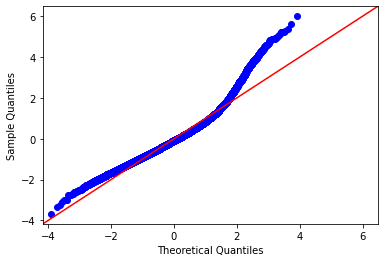

In [47]:
residuals = baseline_model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

# Assumption of regression

In [48]:
# Correlation 'Price' vs all variables

data_corrs = df.corr()['price'].map(abs).sort_values(ascending=False)
data_corrs

price            1
grade         0.65
sqft_living   0.64
bathrooms     0.47
bedrooms      0.31
sqft_lot      0.10
condition     0.04
Name: price, dtype: float64

In [49]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'condition', 'grade'],
      dtype='object')

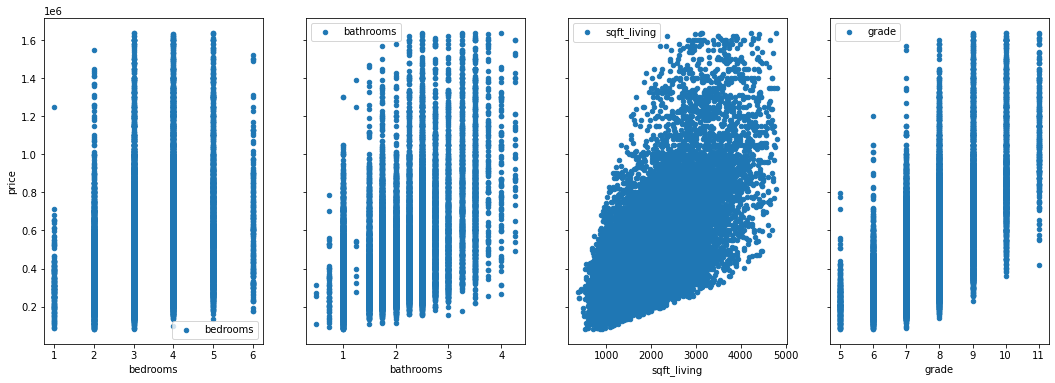

In [50]:
# PLOTING RELATIONSHIP BETWEEN PRICE (BEDROOM, BATHROOM, SQFT_LINVING AND GRADE) AFTER ELIMINATING OUTLIERS

fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'grade']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

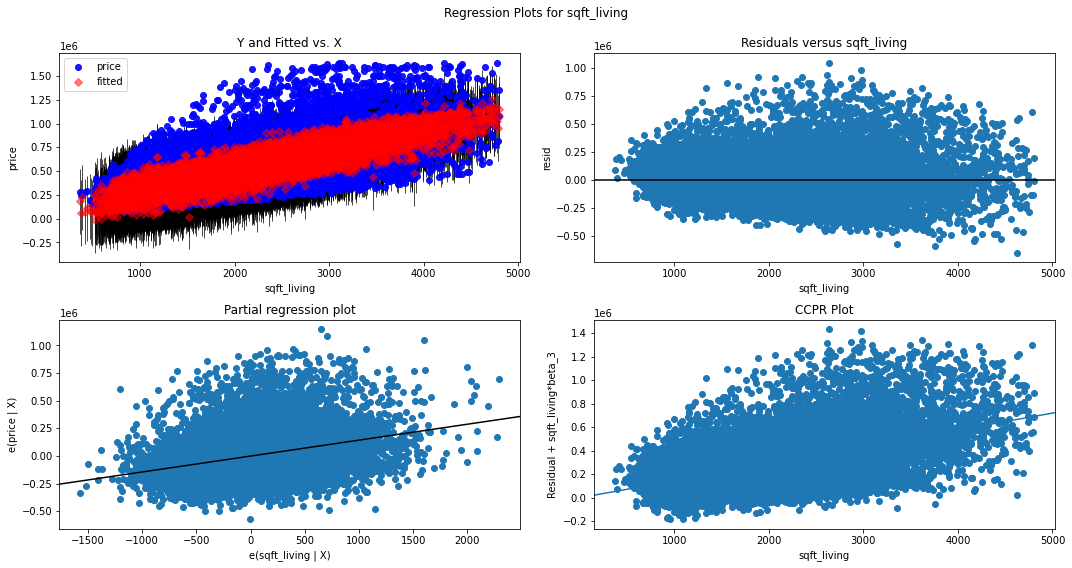

In [51]:
# Regression Plots for 'Price vs Sqft_living'

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(baseline_model, "sqft_living", fig=fig)
plt.show()

Now we see that is a strong correlation meaning that has a homoscedasticity between price and sqft_living is following a great line. Also we can see that bedrooms, bathrooms and grade are categorical so we will need to create dummy variables for each so we can have a more accurate model.

In [52]:
# PREPARATION OF BATHROOMS COLUMNS

df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'condition', 'grade']] # deleted foors and yr_built
df.loc[df['bathrooms'] <= 1,'bathrooms'] = 1
df.loc[(df['bathrooms'] > 1) & (df['bathrooms'] <= 2),'bathrooms'] = 2
df.loc[(df['bathrooms'] > 2) & (df['bathrooms'] <= 3),'bathrooms'] = 3
df.loc[(df['bathrooms'] > 3) & (df['bathrooms'] <= 4),'bathrooms'] = 4
df.loc[(df['bathrooms'] > 4) & (df['bathrooms'] <= 5),'bathrooms'] = 5
df.loc[(df['bathrooms'] > 5) & (df['bathrooms'] <= 6),'bathrooms'] = 6
df.loc[(df['bathrooms'] > 6) & (df['bathrooms'] <= 7),'bathrooms'] = 7
df.loc[(df['bathrooms'] > 7) & (df['bathrooms'] <= 8),'bathrooms'] = 8

In [53]:
# CREATING A COPY OF DATA FRAME BEFORE MODIFIYING WITH DUMMIES FOR FUTURE MODELS

df_model = df.copy()
df_model

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade
0,221900,3,1,1180,5650,3,7
1,538000,3,3,2570,7242,3,7
2,180000,2,1,770,10000,3,6
3,604000,4,3,1960,5000,5,7
4,510000,3,2,1680,8080,3,8
...,...,...,...,...,...,...,...
21592,360000,3,3,1530,1131,3,8
21593,400000,4,3,2310,5813,3,8
21594,402101,2,1,1020,1350,3,7
21595,400000,3,3,1600,2388,3,8


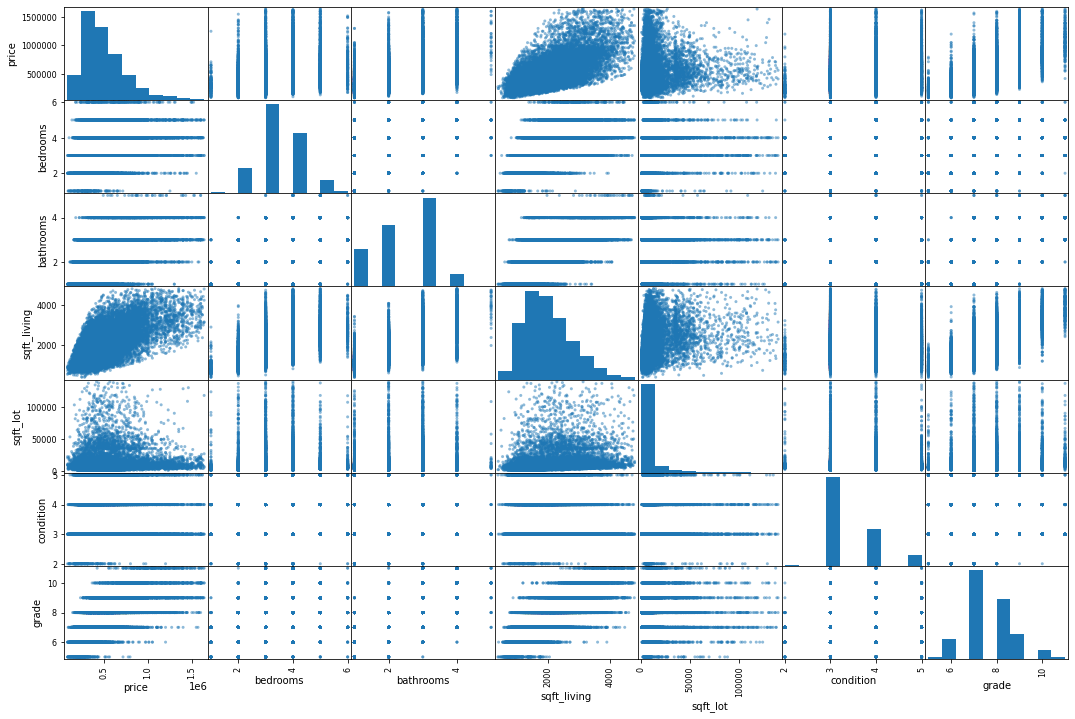

In [54]:
pd.plotting.scatter_matrix(df, figsize=(18,12));


In [55]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'condition', 'grade'],
      dtype='object')

In [56]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade
0,221900,3,1,1180,5650,3,7
1,538000,3,3,2570,7242,3,7
2,180000,2,1,770,10000,3,6
3,604000,4,3,1960,5000,5,7
4,510000,3,2,1680,8080,3,8
...,...,...,...,...,...,...,...
21592,360000,3,3,1530,1131,3,8
21593,400000,4,3,2310,5813,3,8
21594,402101,2,1,1020,1350,3,7
21595,400000,3,3,1600,2388,3,8


In [57]:
# CHANGING 'BATHROOMS' TO INT64

df['bathrooms'] = df['bathrooms'].astype('Int64')

 <h3 align=center>Data with Dummies</h3>

In [58]:
# ADDING DUMMIES FOR "GRADE", "BEDROOMS" AND "BATHROOMS" 

df_dummies = pd.get_dummies(df, columns=['grade', 'bedrooms', 'bathrooms'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20389 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20389 non-null  float64
 1   bedrooms     20389 non-null  int64  
 2   bathrooms    20389 non-null  Int64  
 3   sqft_living  20389 non-null  int64  
 4   sqft_lot     20389 non-null  int64  
 5   condition    20389 non-null  int64  
 6   grade        20389 non-null  int64  
dtypes: Int64(1), float64(1), int64(5)
memory usage: 1.3 MB


In [60]:
#df.columns

df_dummies.columns

Index(['price', 'sqft_living', 'sqft_lot', 'condition', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'bedrooms_1',
       'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6',
       'bathrooms_1', 'bathrooms_2', 'bathrooms_3', 'bathrooms_4',
       'bathrooms_5'],
      dtype='object')

# Model 2 

In [61]:
outcome = 'price'
x_cols = ['sqft_living', 'sqft_lot', 'condition',  # yr_built and # floors
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3',
       'bathrooms_4', 'bathrooms_5']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_2 = ols(formula=formula, data=df_dummies).fit()


model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1301.
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:43:13   Log-Likelihood:            -2.7468e+05
No. Observations:               20389   AIC:                         5.494e+05
Df Residuals:                   20370   BIC:                         5.495e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.119e+05   7699.379     14.539      0.000    9.68e+04    1.27e+05
sqft_living   131.6124      2.997     43.910      0.000     125.737     137.487
sqft_lot       -1.0811      0.092    -11.730      0.000      -1.262      -0.900
condition    5.641e+04   1930.992     29.213      0.000    5.26e+04    6.02e+04
grade_5     -2.369e+05   1.09e+04    -21.803      0.000   -2.58e+05   -2.16e+05
grade_6     -1.929e+05   4948.906    -38.978      0.000   -2.03e+05   -1.83e+05
grade_7     -1.185e+05   3387.685    -34.976      0.000   -1.25e+05   -1.12e+05
grade_8     -1.824e+04   3436.089     -5.307      0.000    -2.5e+04   -1.15e+04
grade_9      1.165e+05   4389.331     26.534      0.000    1.08e+05    1.25e+05
grade_10     2.284e+05   6337.708     36.039      0.000    2.16e+05    2.41e+05
grade_11     3.336e+05   1.15e+04     29.017      0.000    3.11e+05    3.56e+05
bedrooms_1   6.717e+04   1.18e+04      5.716      0.000    4.41e+04    9.02e+04
bedrooms_2   5.311e+04   4288.020     12.385      0.000    4.47e+04    6.15e+04
bedrooms_3      1.8815   3438.574      0.001      1.000   -6738.001    6741.764
bedrooms_4  -1.101e+04   3869.865     -2.844      0.004   -1.86e+04   -3419.849
bedrooms_5  -3139.2985   5436.172     -0.577      0.564   -1.38e+04    7516.035
bedrooms_6   5803.4624   1.09e+04      0.530      0.596   -1.57e+04    2.73e+04
bathrooms_1  1.774e+04   6356.252      2.791      0.005    5284.061    3.02e+04
bathrooms_2   859.6141   5854.544      0.147      0.883   -1.06e+04    1.23e+04
bathrooms_3 -3.578e+04   5631.165     -6.354      0.000   -4.68e+04   -2.47e+04
bathrooms_4  3.416e+04   6876.136      4.968      0.000    2.07e+04    4.76e+04
bathrooms_5  9.496e+04   2.44e+04      3.898      0.000    4.72e+04    1.43e+05
==============================================================================
Omnibus:                     3591.990   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9068.987
Skew:                           0.978   Prob(JB):                         0.00
Kurtosis:                       5.618   Cond. No.                     2.02e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.51e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

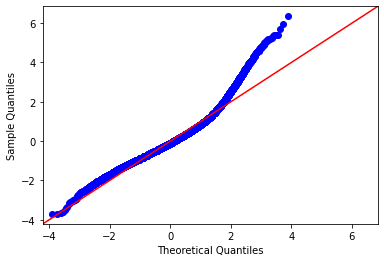

In [62]:
residuals = model_2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

 <h3 align=center>Validation Model 2</h3>

In [63]:
# SELECTING 'X' AND 'Y' VALUES FROM 'DATA_LOG' FOR TRAIN-TEST SPLIT
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

df_dummies

,price,sqft_living,sqft_lot,condition,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,...,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5
0,221900,1180,5650,3,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,538000,2570,7242,3,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,180000,770,10000,3,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,604000,1960,5000,5,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,510000,1680,8080,3,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,1530,1131,3,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
21593,400000,2310,5813,3,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
21594,402101,1020,1350,3,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
21595,400000,1600,2388,3,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [64]:
# TRAIN-TEST SPLIT0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16311 4078 16311 4078


In [65]:
# APPLY AND MODEL THE TRAIN-TEST SET
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


#CALCULATE TRAINING AND TEST RESIDUALS
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test


# CALCUALTE MEAN SQUARE ERROR
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 29604880046.04271
Test Mean Squared Error: 28870636296.166748


In [66]:
# CROSS VALIDATION RESULTS 
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
cv_5_results.mean()

29556823390.112885

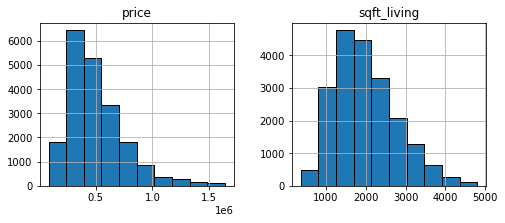

In [67]:
# PLOT DATA
df_dummies.hist(column= ['price', 'sqft_living'] ,figsize=(8,3), edgecolor = 'black');

<h3 align=center>Data Log Transformation</h3>

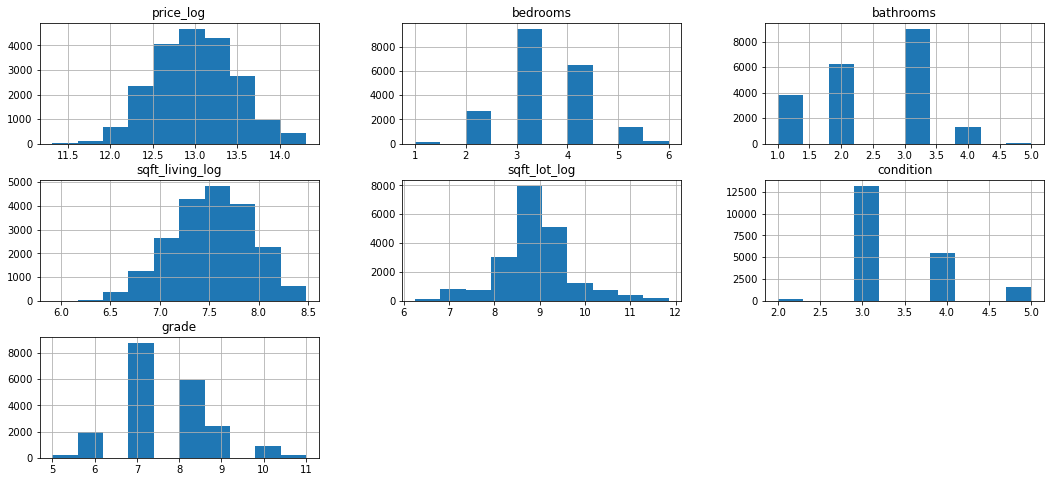

In [68]:
# PERFORM DATA LOG TRANSFORMATION 

data_log = pd.DataFrame([])
   
data_log['price_log'] = np.log(df_model['price'])
data_log['bedrooms'] = (df_model['bedrooms'])
data_log['bathrooms'] = (df_model['bathrooms'])
data_log['sqft_living_log'] = np.log(df_model['sqft_living'])
data_log['sqft_lot_log'] = np.log(df_model['sqft_lot'])
data_log['condition'] = (df_model['condition'])
data_log['grade'] = (df_model['grade'])
   
data_log.hist(figsize  = [18,8]);

In [69]:
# CHANGING 'BATHROOMS' TO INT64

data_log['bathrooms'] = data_log['bathrooms'].astype('Int64')

In [70]:
# ADDING DUMMIES FOR "GRADE", "BEDROOMS" AND "BATHROOMS" 

data_log = pd.get_dummies(data_log, columns=['grade', 'bedrooms', 'bathrooms'])

In [71]:
data_log

,price_log,sqft_living_log,sqft_lot_log,condition,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,...,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5
0,12.31,7.07,8.64,3,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,13.20,7.85,8.89,3,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,12.10,6.65,9.21,3,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,13.31,7.58,8.52,5,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,13.14,7.43,9.00,3,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.79,7.33,7.03,3,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
21593,12.90,7.75,8.67,3,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
21594,12.90,6.93,7.21,3,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
21595,12.90,7.38,7.78,3,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


# Model 3

In [72]:
data_log.columns

Index(['price_log', 'sqft_living_log', 'sqft_lot_log', 'condition', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3',
       'bathrooms_4', 'bathrooms_5'],
      dtype='object')

In [73]:
outcome = 'price_log'
x_cols = ['sqft_living_log', 'sqft_lot_log', 'condition', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'bedrooms_1', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3',
       'bathrooms_4', 'bathrooms_5']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_3 = ols(formula=formula, data=data_log).fit()

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     1256.
Date:                Sun, 23 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:43:14   Log-Likelihood:                -6222.5
No. Observations:               20389   AIC:                         1.248e+04
Df Residuals:                   20370   BIC:                         1.263e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.0469      0.057    105.664      0.000       5.935       6.159
sqft_living_log     0.5742      0.012     48.574      0.000       0.551       0.597
sqft_lot_log       -0.0722      0.003    -22.012      0.000      -0.079      -0.066
condition           0.1059      0.004     28.563      0.000       0.099       0.113
grade_5             0.3306      0.021     15.806      0.000       0.290       0.372
grade_6             0.4772      0.010     45.828      0.000       0.457       0.498
grade_7             0.6647      0.009     74.462      0.000       0.647       0.682
grade_8             0.8695      0.010     85.443      0.000       0.850       0.889
grade_9             1.0914      0.013     86.411      0.000       1.067       1.116
grade_10            1.2475      0.016     78.723      0.000       1.216       1.279
grade_11            1.3660      0.024     56.296      0.000       1.318       1.414
bedrooms_1          1.1664      0.023     50.873      0.000       1.121       1.211
bedrooms_2          1.0831      0.011    101.896      0.000       1.062       1.104
bedrooms_3          0.9484      0.011     86.497      0.000       0.927       0.970
bedrooms_4          0.9347      0.013     72.593      0.000       0.909       0.960
bedrooms_5          0.9464      0.015     61.434      0.000       0.916       0.977
bedrooms_6          0.9680      0.024     40.224      0.000       0.921       1.015
bathrooms_1         1.2535      0.015     86.049      0.000       1.225       1.282
bathrooms_2         1.1957      0.015     78.932      0.000       1.166       1.225
bathrooms_3         1.1198      0.016     71.060      0.000       1.089       1.151
bathrooms_4         1.2059      0.018     67.106      0.000       1.171       1.241
bathrooms_5         1.2720      0.048     26.345      0.000       1.177       1.367
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.147
Skew:                          -0.002   Prob(JB):                        0.929
Kurtosis:                       3.012   Cond. No.                     1.32e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.77e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

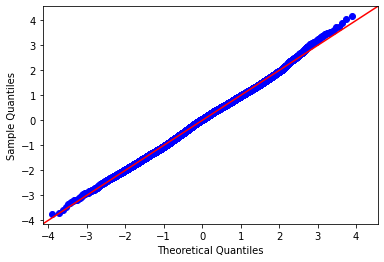

In [74]:
 residuals = model_3.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

 <h3 align=center>Validation Model 3</h3>

In [75]:
# SELECTING 'X' AND 'Y' VALUES FROM 'DATA_LOG' FOR TRAIN-TEST SPLIT

X = data_log.drop('price_log', axis=1)
y = data_log['price_log']

data_log

,price_log,sqft_living_log,sqft_lot_log,condition,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,...,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5
0,12.31,7.07,8.64,3,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,13.20,7.85,8.89,3,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,12.10,6.65,9.21,3,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,13.31,7.58,8.52,5,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,13.14,7.43,9.00,3,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.79,7.33,7.03,3,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
21593,12.90,7.75,8.67,3,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
21594,12.90,6.93,7.21,3,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
21595,12.90,7.38,7.78,3,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [76]:
# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16311 4078 16311 4078


In [77]:
# APPLY AND MODEL THE TRAIN-TEST SET
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


#CALCULATE TRAINING AND TEST RESIDUALS
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test


# CALCUALTE MEAN SQUARE ERROR
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.10741154877048158
Test Mean Squared Error: 0.1094251073775063


In [78]:
# CROSS VALIDATION RESULTS 
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
cv_5_results.mean()

0.10815869701314149